In [44]:
import unicodecsv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('../data/enrollments.csv')
daily_engagement = read_csv('../data/daily_engagement.csv')
project_submissions = read_csv('../data/project_submissions.csv')

In [45]:
print enrollments[0]
print daily_engagement[0]
print project_submissions[0]

{u'status': u'canceled', u'is_udacity': u'True', u'is_canceled': u'True', u'join_date': u'2014-11-10', u'account_key': u'448', u'cancel_date': u'2015-01-14', u'days_to_cancel': u'65'}
{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': u'2015-01-16', u'creation_date': u'2015-01-14'}


In [46]:
from datetime import datetime as dt

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)
    
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visted'] = int(float(engagement_record['total_minutes_visited']))
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])

for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

print enrollments[0]
print daily_engagement[0]
print project_submissions[0]

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'448', u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), u'days_to_cancel': 65}
{u'lessons_completed': 0, u'num_courses_visited': 1, 'total_minutes_visted': 11, u'total_minutes_visited': u'11.6793745', u'projects_completed': 0, u'acct': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
{u'lesson_key': u'3176718735', u'processing_state': u'EVALUATED', u'account_key': u'256', u'assigned_rating': u'UNGRADED', u'completion_date': datetime.datetime(2015, 1, 16, 0, 0), u'creation_date': datetime.datetime(2015, 1, 14, 0, 0)}


In [47]:
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del(engagement_record['acct'])

print daily_engagement[0]

{u'lessons_completed': 0, u'num_courses_visited': 1, 'total_minutes_visted': 11, u'total_minutes_visited': u'11.6793745', u'projects_completed': 0, 'account_key': u'0', u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


In [48]:
def get_unique_students(data):
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students

unique_enrolled_students = get_unique_students(enrollments)
unique_engagement_students = get_unique_students(daily_engagement)
unique_project_submitters = get_unique_students(project_submissions)

In [49]:
print len(unique_enrolled_students)

1302


In [50]:
print len(unique_engagement_students)

1237


In [51]:
print len(unique_project_submitters)

743


In [52]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


In [53]:
num_of_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students and enrollment['join_date'] != enrollment['cancel_date']:
        num_of_students += 1
        print enrollment
        
print num_of_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}
3


In [54]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
        
print len(udacity_test_accounts)

6


In [55]:
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [56]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)

1622
135656
3634


In [57]:
print non_udacity_enrollments[0]

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'700', u'cancel_date': datetime.datetime(2014, 11, 16, 0, 0), u'days_to_cancel': 6}


In [58]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if not enrollment['is_canceled'] or enrollment['days_to_cancel'] > 7:
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        
        if account_key not in paid_students or enrollment_date > paid_students[account_key]:
            paid_students[account_key] = enrollment_date
        
print len(paid_students)

995


In [59]:
def remove_free_trails_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

In [63]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7 and time_delta.days >= 0

paid_engagement_in_first_week = []

for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']
    
    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)
        
print len(paid_engagement_in_first_week)

6919


In [60]:
paid_enrollments = remove_free_trails_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trails_cancels(non_udacity_engagement)
paid_submissions = remove_free_trails_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

1293
134549
3618


In [99]:
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0

### Exploring student engagement

In [100]:
from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')

In [101]:
def sum_grouped_data(grouped_data, field_name):
    summed_data = {}
    
    for key, data_points in grouped_data.items():
        total = 0
        for data_point in data_points:
            total += float(data_point[field_name])
        summed_data[key] = total
    
    return summed_data

total_minutes_by_account = sum_grouped_data(engagement_by_account, 'total_minutes_visited')

Populating the interactive namespace from numpy and matplotlib
Mean: 306.708326753
Standard deviation: 412.996933409
Minimum: 0.0
Maximum: 3564.7332645


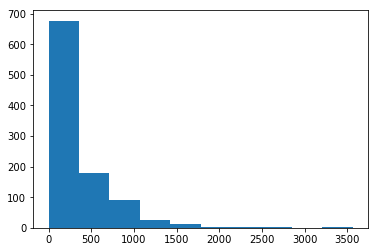

In [156]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np

def describe_data(data):
    print 'Mean:', np.mean(data)
    print 'Standard deviation:', np.std(data)
    print 'Minimum:', np.min(data)
    print 'Maximum:', np.max(data)
    plt.hist(data)
    
total_minutes = total_minutes_by_account.values()
describe_data(total_minutes)

In [157]:
student_with_max_minutes = None
max_minutes = 0

for student, total_minutes in total_minutes_by_account.items():
        if total_minutes > max_minutes:
            max_minutes = total_minutes
            student_with_max_minutes = student
print max_minutes

3564.7332645


In [158]:
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print engagement_record

{u'lessons_completed': 4, u'num_courses_visited': 4, 'has_visited': 1, 'total_minutes_visted': 850, u'total_minutes_visited': u'850.519339666', u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 6, 'has_visited': 1, 'total_minutes_visted': 872, u'total_minutes_visited': u'872.633923334', u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{u'lessons_completed': 6, u'num_courses_visited': 2, 'has_visited': 1, 'total_minutes_visted': 777, u'total_minutes_visited': u'777.018903666', u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{u'lessons_completed': 2, u'num_courses_visited': 1, 'has_visited': 1, 'total_minutes_visted': 294, u'total_minutes_visited': u'294.568774', u'projects_completed': 0, 'account_key': u'163', u'utc_date': datetime.datetime(2015, 7, 12, 0, 0)}
{u'lessons_completed': 1, u'

Mean: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0.0
Maximum: 36.0


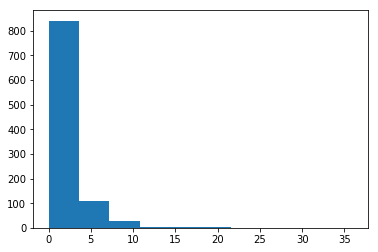

In [159]:
lessons_completed_by_account = sum_grouped_data(engagement_by_account, 'lessons_completed')
total_lessons = lessons_completed_by_account.values()
describe_data(total_lessons)

Mean: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0.0
Maximum: 7.0


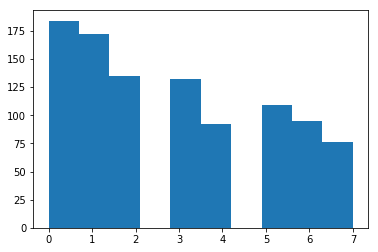

In [160]:
days_visited_by_account = sum_grouped_data(engagement_by_account, 'has_visited')
describe_data(days_visited_by_account.values())

In [161]:
paid_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [162]:
subway_project_lesson_keys = ['746169184', '3176718735']
passed_criteria = ['PASSED', 'DISTINCTION']

pass_subway_project = set()

for submission in paid_submissions:
    project = submission['lesson_key']
    rating = submission['assigned_rating']
    
    if project in subway_project_lesson_keys and rating in passed_criteria:
        pass_subway_project.add(submission['account_key'])

print len(pass_subway_project)

647


In [163]:
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print len(passing_engagement)
print len(non_passing_engagement)

4527
2392


In [164]:
passing_engagement_by_account = group_data(passing_engagement, 'account_key')

non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')

non-passing students:
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933

passing students:
Mean: 394.586046484
Standard deviation: 448.499519327
Minimum: 0.0
Maximum: 3564.7332645


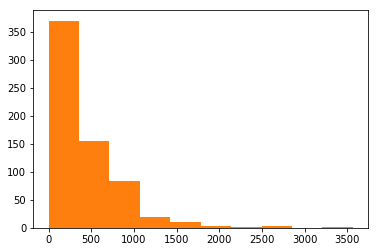

In [165]:
print 'non-passing students:'
non_passing_minutes = sum_grouped_data(non_passing_engagement_by_account, 'total_minutes_visited')
describe_data(non_passing_minutes.values())

print '\npassing students:'
passing_minutes = sum_grouped_data(passing_engagement_by_account, 'total_minutes_visited')
describe_data(passing_minutes.values())

non-passing students:
Mean: 0.862068965517
Standard deviation: 2.54915994183
Minimum: 0.0
Maximum: 27.0

passing students:
Mean: 2.05255023184
Standard deviation: 3.14222705558
Minimum: 0.0
Maximum: 36.0


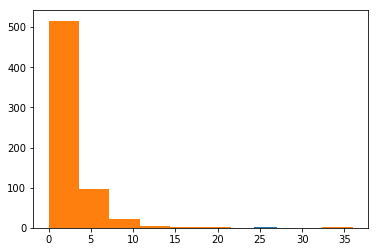

In [166]:
print 'non-passing students:'
non_passing_lessons = sum_grouped_data(non_passing_engagement_by_account, 'lessons_completed')
describe_data(non_passing_lessons.values())

print '\npassing students:'
passing_lessons = sum_grouped_data(passing_engagement_by_account, 'lessons_completed')
describe_data(passing_lessons.values())

non-passing students:
Mean: 1.90517241379
Standard deviation: 1.90573144136
Minimum: 0.0
Maximum: 7.0

passing students:
Mean: 3.38485316847
Standard deviation: 2.25882147092
Minimum: 0.0
Maximum: 7.0


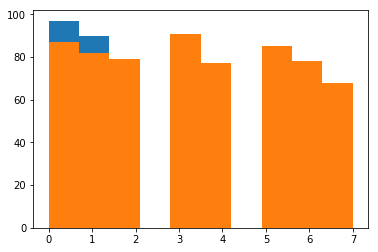

In [167]:
print 'non-passing students:'
non_passing_visits = sum_grouped_data(non_passing_engagement_by_account, 'has_visited')
describe_data(non_passing_visits.values())

print '\npassing students:'
passing_visits = sum_grouped_data(passing_engagement_by_account, 'has_visited')
describe_data(passing_visits.values())